In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import random 
import matplotlib.pyplot as plt
import math

random.seed(10)

In [2]:
## Defining the function
def matrix_scaling(A,r,c, tolerance = 10**(-8)):
    (m,n) = np.shape(A)
    one_m = np.zeros(m) + 1
    one_n = np.zeros(n) + 1
    row_sum = A@one_n
    column_sum = A.T@one_m
    
    x_scale = one_m
    y_scale = one_n
    k = 1
    
    while max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)) > tolerance:
        k = k+1
        if k % 2 == 0:
            x = r/row_sum
            x_scale = x_scale*x
            A = np.diag(x)@A
        else:
            y = c/column_sum
            y_scale = y_scale*y
            A = A@np.diag(y)
                 
        #print(max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)))
        row_sum = A@one_n
        column_sum = A.T@one_m
    
    return x_scale, y_scale, A

def normalise(x,y):
    n_x = np.linalg.norm(x,1)
    n_y = np.linalg.norm(y,1)
    alpha = np.sqrt(n_x/n_y)
    
    return x/alpha, y*alpha

def dist(x,y,x_avg,y_avg):
    x_max = np.max(np.abs(x/x_avg - 1))
    y_max = np.max(np.abs(y/y_avg - 1))
    return max(x_max, y_max)



In [164]:
sample = np.random.uniform(low = 1.0, high=2.0, size =(25,25))
r = np.zeros(25)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

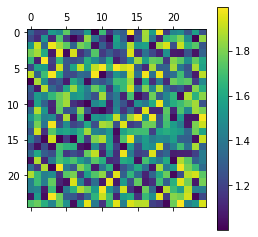

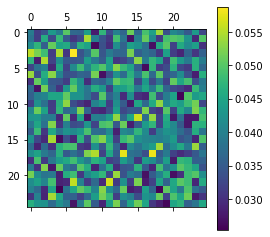

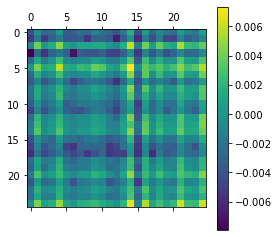

In [165]:
plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
plt.matshow(sample/(1.5*25) - scaled_sample)
plt.colorbar()

In [166]:
print(x_factor)
print(y_factor)

[0.17001435 0.17729893 0.15519147 0.17701725 0.16118815 0.15149149
 0.16019019 0.17207524 0.160529   0.16270983 0.1691705  0.17239839
 0.16056853 0.15924433 0.15786305 0.16894729 0.17523181 0.17704785
 0.16515732 0.16421457 0.15727612 0.16690047 0.16054047 0.16381607
 0.15305573]
[0.17573315 0.15825703 0.17038975 0.16659061 0.15604604 0.16873963
 0.1717078  0.16769042 0.16773556 0.16289925 0.16544342 0.17136853
 0.17446652 0.1647587  0.1512621  0.17770065 0.15515603 0.16795219
 0.15913413 0.166289   0.16613275 0.15383705 0.16244673 0.1642279
 0.15317345]


In [167]:
#################### Introducing a Block Structure ###################
sample[15:25,0:15] = np.zeros((10,15)) + 1.5
sample[0:15, 15:25] = np.zeros((15,10)) + 1.5

In [168]:
r = np.zeros(25)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

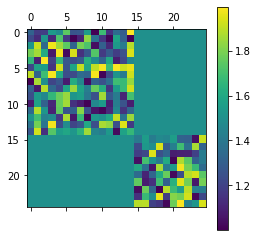

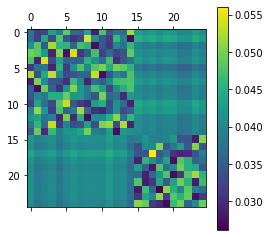

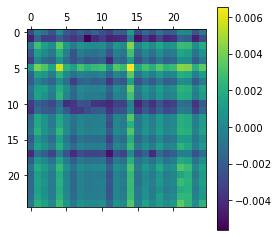

In [169]:
plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
plt.matshow(sample/(1.5*25) - scaled_sample)
plt.colorbar()

In [170]:
pd.DataFrame({"row_sum": sample@r, "row_wt": x_factor, "col_sum": sample.T@r, "col_wt": y_factor})

,row_sum,row_wt,col_sum,col_wt
0,35.985229,0.169534,35.743641,0.170606
1,34.249092,0.178017,38.408158,0.158746
2,38.480125,0.158595,37.544602,0.162235
3,37.245233,0.163818,36.629164,0.166716
4,36.182435,0.168361,38.972861,0.156225
5,40.205432,0.151584,37.044422,0.164502
6,37.703177,0.161688,35.797996,0.170510
7,36.175393,0.168639,36.930873,0.165360
8,37.936049,0.160592,36.501016,0.167009
9,37.620741,0.162112,36.594096,0.166776


In [171]:
#################### Introducing a Block Structure ###################
sample[15:25,0:15] = np.zeros((10,15)) + 5
sample[0:15, 15:25] = np.zeros((15,10)) + 5

In [172]:
r = np.zeros(25)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

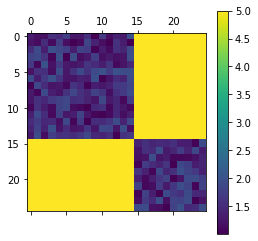

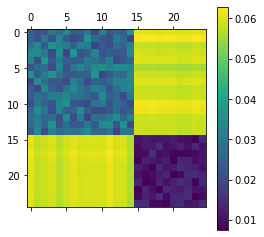

In [173]:
plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
#plt.matshow(sample/(1.5*25) - scaled_sample)
#plt.colorbar()

In [174]:
pd.DataFrame({"row_sum": sample@r, "row_wt": x_factor, "col_sum": sample.T@r, "col_wt": y_factor})

,row_sum,row_wt,col_sum,col_wt
0,70.985229,0.138948,70.743641,0.139553
1,69.249092,0.143608,73.408158,0.132836
2,73.480125,0.132723,72.544602,0.134875
3,72.245233,0.135731,71.629164,0.137338
4,71.182435,0.138337,73.972861,0.131412
5,75.205432,0.128639,72.044422,0.136153
6,72.703177,0.134539,70.797996,0.139472
7,71.175393,0.138451,71.930873,0.136577
8,72.936049,0.133927,71.501016,0.137559
9,72.620741,0.134769,71.594096,0.137393


In [175]:
#################### Introducing a Block Structure ###################
sample[15:25,0:15] = np.zeros((10,15)) 
sample[0:15, 15:25] = np.zeros((15,10))

In [176]:
r = np.zeros(25)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

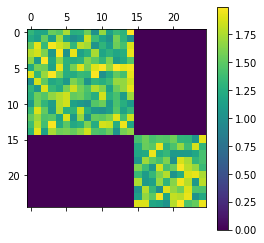

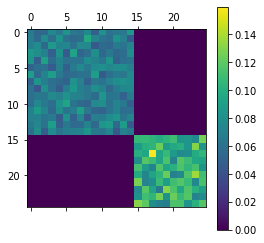

In [177]:
plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
#plt.matshow(sample/(1.5*25) - scaled_sample)
#plt.colorbar()

In [178]:
pd.DataFrame({"row_sum": sample@r, "row_wt": x_factor, "col_sum": sample.T@r, "col_wt": y_factor})

,row_sum,row_wt,col_sum,col_wt
0,20.985229,0.205079,20.743641,0.246614
1,19.249092,0.223114,23.408158,0.218592
2,23.480125,0.183596,22.544602,0.226287
3,22.245233,0.193586,21.629164,0.237557
4,21.182435,0.202351,23.972861,0.212599
5,25.205432,0.170466,22.044422,0.231683
6,22.703177,0.189266,20.797996,0.246630
7,21.175393,0.203226,21.930873,0.234248
8,22.936049,0.187037,21.501016,0.237698
9,22.620741,0.190190,21.594096,0.237460


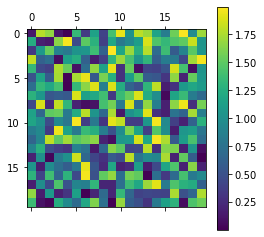

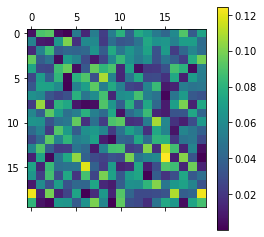

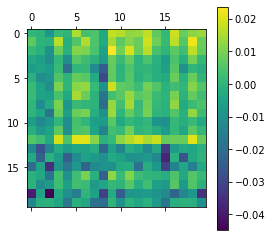

In [208]:
## Sending some entries to zero

## Sending one entry in a row to zero

sample = np.random.uniform(low = 0.0, high=2.0, size =(20,20))
sample[10,10] = 1.805
r = np.zeros(20)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
plt.matshow(sample/(1*20) - scaled_sample)
plt.colorbar()

In [209]:
pd.DataFrame({"row_sum": sample@r, "row_wt": x_factor, "col_sum": sample.T@r, "col_wt": y_factor})

,row_sum,row_wt,col_sum,col_wt
0,22.998014,0.190459,18.206601,0.232817
1,23.309812,0.191242,17.087576,0.264135
2,22.670792,0.193866,15.548544,0.290110
3,19.923552,0.224216,21.405319,0.208994
4,18.562250,0.235263,16.779597,0.266365
5,19.804880,0.225954,21.498223,0.201934
6,21.566853,0.204347,21.425784,0.206975
7,21.055754,0.208554,18.842205,0.241961
8,20.541367,0.212570,14.532287,0.302537
9,20.730142,0.214842,22.587306,0.196460


In [210]:
pd.DataFrame({"row_sum": sample@r, "row_wt": x_factor, "col_sum": sample.T@r, "col_wt": y_factor})

,row_sum,row_wt,col_sum,col_wt
0,22.998014,0.190459,18.206601,0.232817
1,23.309812,0.191242,17.087576,0.264135
2,22.670792,0.193866,15.548544,0.290110
3,19.923552,0.224216,21.405319,0.208994
4,18.562250,0.235263,16.779597,0.266365
5,19.804880,0.225954,21.498223,0.201934
6,21.566853,0.204347,21.425784,0.206975
7,21.055754,0.208554,18.842205,0.241961
8,20.541367,0.212570,14.532287,0.302537
9,20.730142,0.214842,22.587306,0.196460


In [214]:
x_factors = []
y_factors = []
row_sums = []
col_sums = []

for i in range(0,9):
    sample[10,10] = sample[10,10] - 0.2
    #print(sample[10,10])
    x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
    x_factor, y_factor = normalise(x_factor, y_factor)
    
    x_factors = x_factors + [x_factor]
    y_factors = y_factors + [y_factor]
    row_sums = row_sums + [sample@r]
    col_sums = col_sums + [sample.T@r]

In [215]:
pd.DataFrame(np.array(x_factors).T)

,0,1,2,3,4,5,6,7,8
0,0.187791,0.187518,0.187220,0.186892,0.186526,0.186113,0.185640,0.185083,0.184406
1,0.190714,0.190659,0.190598,0.190531,0.190456,0.190371,0.190272,0.190155,0.190010
2,0.192592,0.192460,0.192315,0.192156,0.191978,0.191776,0.191544,0.191270,0.190935
3,0.221068,0.220746,0.220395,0.220007,0.219576,0.219090,0.218531,0.217875,0.217076
4,0.235596,0.235630,0.235667,0.235707,0.235752,0.235803,0.235861,0.235928,0.236011
5,0.226294,0.226328,0.226366,0.226407,0.226452,0.226504,0.226562,0.226631,0.226714
6,0.202983,0.202841,0.202686,0.202514,0.202322,0.202105,0.201855,0.201559,0.201196
7,0.206434,0.206216,0.205978,0.205715,0.205422,0.205091,0.204711,0.204263,0.203717
8,0.211688,0.211597,0.211496,0.211385,0.211260,0.211119,0.210957,0.210764,0.210528
9,0.215620,0.215700,0.215788,0.215885,0.215993,0.216115,0.216255,0.216420,0.216622


In [216]:
pd.DataFrame(np.array(y_factors).T)

,0,1,2,3,4,5,6,7,8
0,0.230939,0.230744,0.230531,0.230296,0.230033,0.229736,0.229393,0.228989,0.228495
1,0.261799,0.261558,0.261295,0.261005,0.260682,0.260317,0.259898,0.259404,0.258801
2,0.289688,0.289643,0.289594,0.289539,0.289477,0.289406,0.289324,0.289226,0.289106
3,0.207494,0.207340,0.207171,0.206985,0.206778,0.206544,0.206275,0.205959,0.205572
4,0.264519,0.264328,0.264120,0.263890,0.263634,0.263345,0.263012,0.262620,0.262140
5,0.198665,0.198332,0.197968,0.197568,0.197122,0.196620,0.196045,0.195369,0.194547
6,0.206970,0.206970,0.206969,0.206967,0.206966,0.206964,0.206962,0.206959,0.206956
7,0.240649,0.240514,0.240365,0.240201,0.240018,0.239811,0.239572,0.239291,0.238946
8,0.302748,0.302769,0.302791,0.302815,0.302842,0.302872,0.302905,0.302943,0.302989
9,0.193256,0.192930,0.192574,0.192182,0.191747,0.191256,0.190694,0.190034,0.189231


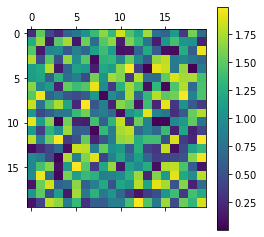

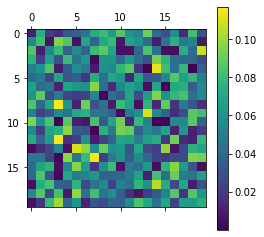

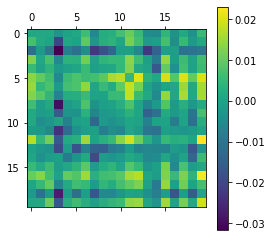

In [217]:
## Sending some entries to 10

## Sending one entry in a row to 10

sample = np.random.uniform(low = 0.0, high=2.0, size =(20,20))
sample[10,10] = 1.805
r = np.zeros(20)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
plt.matshow(sample/(1*20) - scaled_sample)
plt.colorbar()

In [218]:
pd.DataFrame({"row_sum": sample@r, "row_wt": x_factor, "col_sum": sample.T@r, "col_wt": y_factor})

,row_sum,row_wt,col_sum,col_wt
0,20.469840,0.218487,21.909067,0.204182
1,20.523861,0.217244,20.509825,0.224828
2,15.757911,0.283832,21.033350,0.214734
3,21.665199,0.210093,15.297982,0.293386
4,20.704410,0.222336,19.839636,0.227346
5,24.006094,0.185167,19.971518,0.221977
6,22.623219,0.200522,22.070138,0.201807
7,22.173432,0.201696,18.030316,0.247529
8,19.779155,0.228103,19.775768,0.222577
9,18.905874,0.237503,20.335603,0.219872


In [219]:
pd.DataFrame({"row_sum": sample@r, "row_wt": x_factor, "col_sum": sample.T@r, "col_wt": y_factor})

,row_sum,row_wt,col_sum,col_wt
0,20.469840,0.218487,21.909067,0.204182
1,20.523861,0.217244,20.509825,0.224828
2,15.757911,0.283832,21.033350,0.214734
3,21.665199,0.210093,15.297982,0.293386
4,20.704410,0.222336,19.839636,0.227346
5,24.006094,0.185167,19.971518,0.221977
6,22.623219,0.200522,22.070138,0.201807
7,22.173432,0.201696,18.030316,0.247529
8,19.779155,0.228103,19.775768,0.222577
9,18.905874,0.237503,20.335603,0.219872


In [220]:
x_factors = []
y_factors = []
row_sums = []
col_sums = []

for i in range(0,9):
    sample[10,10] = sample[10,10] + 1
    #print(sample[10,10])
    x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
    x_factor, y_factor = normalise(x_factor, y_factor)
    
    x_factors = x_factors + [x_factor]
    y_factors = y_factors + [y_factor]
    row_sums = row_sums + [sample@r]
    col_sums = col_sums + [sample.T@r]

In [221]:
pd.DataFrame(np.array(x_factors).T)

,0,1,2,3,4,5,6,7,8
0,0.219104,0.219630,0.220087,0.220490,0.220850,0.221174,0.221468,0.221737,0.221985
1,0.217088,0.216956,0.216841,0.216739,0.216649,0.216567,0.216493,0.216426,0.216363
2,0.283585,0.283375,0.283193,0.283032,0.282889,0.282760,0.282643,0.282536,0.282438
3,0.210322,0.210515,0.210683,0.210830,0.210960,0.211078,0.211184,0.211281,0.211371
4,0.222998,0.223563,0.224053,0.224486,0.224873,0.225221,0.225538,0.225828,0.226095
5,0.185487,0.185758,0.185994,0.186201,0.186385,0.186551,0.186701,0.186839,0.186965
6,0.200794,0.201024,0.201224,0.201399,0.201555,0.201696,0.201823,0.201939,0.202045
7,0.201824,0.201931,0.202024,0.202106,0.202178,0.202243,0.202301,0.202355,0.202404
8,0.228762,0.229324,0.229812,0.230242,0.230626,0.230972,0.231287,0.231575,0.231840
9,0.237331,0.237184,0.237057,0.236945,0.236845,0.236754,0.236673,0.236598,0.236529


In [222]:
pd.DataFrame(np.array(y_factors).T)

,0,1,2,3,4,5,6,7,8
0,0.204832,0.205386,0.205867,0.206292,0.206671,0.207013,0.207324,0.207608,0.207870
1,0.225185,0.225488,0.225750,0.225981,0.226187,0.226372,0.226540,0.226694,0.226835
2,0.215253,0.215694,0.216077,0.216415,0.216715,0.216986,0.217232,0.217456,0.217663
3,0.293002,0.292677,0.292395,0.292147,0.291926,0.291728,0.291548,0.291384,0.291233
4,0.227966,0.228494,0.228953,0.229357,0.229718,0.230043,0.230338,0.230608,0.230857
5,0.221831,0.221708,0.221601,0.221506,0.221422,0.221346,0.221278,0.221215,0.221157
6,0.201621,0.201462,0.201324,0.201203,0.201095,0.200998,0.200910,0.200829,0.200755
7,0.248201,0.248774,0.249271,0.249710,0.250102,0.250455,0.250776,0.251070,0.251340
8,0.222626,0.222666,0.222701,0.222730,0.222757,0.222780,0.222801,0.222819,0.222837
9,0.220330,0.220720,0.221058,0.221355,0.221621,0.221860,0.222077,0.222275,0.222457


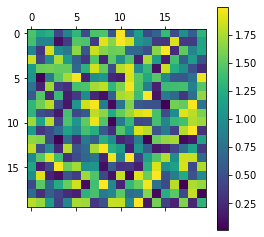

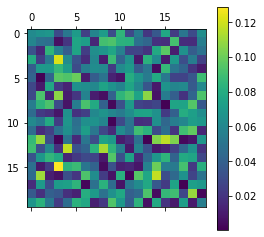

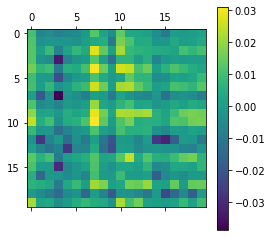

In [108]:
## Sending all elements of the row to 0

sample = np.random.uniform(low = 0.0, high=2.0, size =(20,20))
r = np.zeros(20)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
plt.matshow(sample/(1*20) - scaled_sample)
plt.colorbar()

In [109]:
x_factors = []
y_factors = []
row_sums = []
col_sums = []
row_sum_10 = []

for i in range(0,15):
    sample[10,:] = sample[10,:]/1.5
    row_sum_10 = row_sum_10 + [(sample@r)[10]]
    #print("row sum:", sample@r)
    x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
    x_factor, y_factor = normalise(x_factor, y_factor)
    
    x_factors = x_factors + [x_factor]
    y_factors = y_factors + [y_factor]
    row_sums = row_sums + [sample@r]
    col_sums = col_sums + [sample.T@r]

row sum: [19.98782704 20.79966095 23.01694283 19.47833098 24.02032334 20.6026941
 23.65842865 17.37611606 20.92062069 24.71594108 16.1020045  20.23698862
 16.11422245 17.42961192 23.16965763 20.01526644 19.19968628 23.13329213
 16.7287402  22.23084624]
row sum: [19.98782704 20.79966095 23.01694283 19.47833098 24.02032334 20.6026941
 23.65842865 17.37611606 20.92062069 24.71594108 10.73466967 20.23698862
 16.11422245 17.42961192 23.16965763 20.01526644 19.19968628 23.13329213
 16.7287402  22.23084624]
row sum: [19.98782704 20.79966095 23.01694283 19.47833098 24.02032334 20.6026941
 23.65842865 17.37611606 20.92062069 24.71594108  7.15644645 20.23698862
 16.11422245 17.42961192 23.16965763 20.01526644 19.19968628 23.13329213
 16.7287402  22.23084624]
row sum: [19.98782704 20.79966095 23.01694283 19.47833098 24.02032334 20.6026941
 23.65842865 17.37611606 20.92062069 24.71594108  4.7709643  20.23698862
 16.11422245 17.42961192 23.16965763 20.01526644 19.19968628 23.13329213
 16.7287402  2

In [110]:
pd.DataFrame(np.array(x_factors).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.227913,0.224414,0.219455,0.212597,0.203418,0.191637,0.177266,0.160717,0.142783,0.124460,0.106714,0.090277,0.075587,0.062805,0.051899
1,0.221134,0.217739,0.212928,0.206274,0.197368,0.185937,0.171994,0.155937,0.138536,0.120759,0.103540,0.087592,0.073339,0.060937,0.050356
2,0.192697,0.189739,0.185547,0.179748,0.171988,0.162027,0.149876,0.135885,0.120721,0.105230,0.090225,0.076328,0.063908,0.053101,0.043880
3,0.229063,0.225547,0.220563,0.213671,0.204445,0.192605,0.178161,0.161529,0.143503,0.125089,0.107252,0.090733,0.075968,0.063122,0.052161
4,0.186722,0.183856,0.179793,0.174175,0.166655,0.157003,0.145229,0.131671,0.116978,0.101967,0.087427,0.073962,0.061926,0.051454,0.042519
5,0.215097,0.211795,0.207115,0.200643,0.191980,0.180861,0.167298,0.151680,0.134754,0.117462,0.100713,0.085201,0.071337,0.059273,0.048981
6,0.193847,0.190871,0.186654,0.180821,0.173014,0.162994,0.150770,0.136695,0.121441,0.105858,0.090763,0.076784,0.064289,0.053417,0.044142
7,0.259477,0.255494,0.249848,0.242041,0.231590,0.218178,0.201816,0.182976,0.162557,0.141697,0.121493,0.102780,0.086055,0.071503,0.059087
8,0.220335,0.216952,0.212159,0.205529,0.196655,0.185266,0.171372,0.155374,0.138035,0.120322,0.103166,0.087276,0.073074,0.060717,0.050174
9,0.187218,0.184344,0.180271,0.174637,0.167097,0.157420,0.145615,0.132021,0.117288,0.102238,0.087660,0.074158,0.062091,0.051591,0.042632


In [111]:
pd.DataFrame(np.array(y_factors).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.187879,0.190808,0.195120,0.201414,0.210503,0.223443,0.241558,0.266431,0.299897,0.344045,0.401262,0.474316,0.566502,0.681796,0.825063
1,0.243151,0.246942,0.252522,0.260668,0.272430,0.289178,0.312622,0.344812,0.388123,0.445260,0.519308,0.613855,0.733160,0.882373,1.067788
2,0.235213,0.238880,0.244278,0.252157,0.263536,0.279737,0.302415,0.333555,0.375452,0.430723,0.502354,0.593814,0.709224,0.853565,1.032926
3,0.301764,0.306469,0.313394,0.323503,0.338101,0.358886,0.387981,0.427931,0.481682,0.552592,0.644490,0.761828,0.909892,1.095073,1.325183
4,0.248860,0.252740,0.258450,0.266787,0.278826,0.295967,0.319961,0.352907,0.397235,0.455713,0.531500,0.628266,0.750372,0.903088,1.092856
5,0.235361,0.239031,0.244432,0.252316,0.263702,0.279913,0.302606,0.333765,0.375689,0.430994,0.502671,0.594188,0.709671,0.854104,1.033578
6,0.225603,0.229121,0.234298,0.241856,0.252769,0.268308,0.290060,0.319927,0.360113,0.413126,0.481830,0.569554,0.680249,0.818693,0.990727
7,0.180252,0.183063,0.187199,0.193238,0.201957,0.214373,0.231752,0.255615,0.287723,0.330079,0.384973,0.455062,0.543505,0.654119,0.791570
8,0.214364,0.217706,0.222626,0.229807,0.240177,0.254942,0.275610,0.303989,0.342173,0.392545,0.457827,0.541180,0.646360,0.777908,0.941371
9,0.255523,0.259507,0.265370,0.273931,0.286291,0.303891,0.328528,0.362356,0.407871,0.467915,0.545731,0.645088,0.770464,0.927268,1.122117


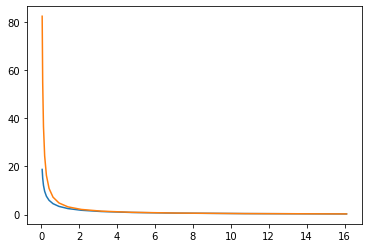

In [125]:
x = np.array(x_factors).T[10,:]
plt.plot(row_sum_10, x)

y = [x[0]]
for i in range(0,14):
    y = y + [y[-1]*1.5]  

plt.plot(row_sum_10, y)

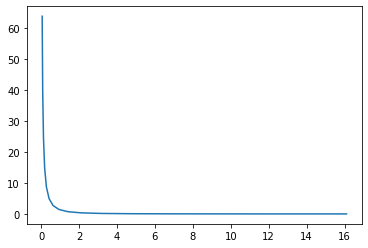

In [126]:
plt.plot(row_sum_10, y-x)

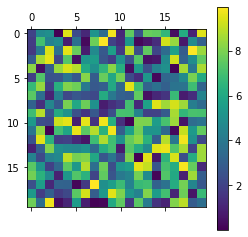

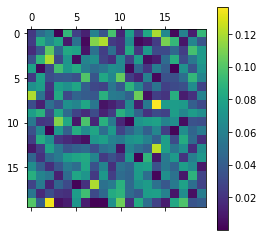

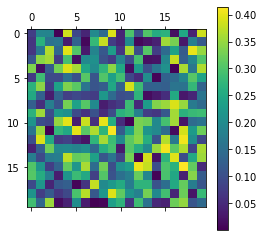

In [202]:
## Sending all elements of the row to 0

sample = np.random.uniform(low = 0.0, high=10.0, size =(20,20))
r = np.zeros(20)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
plt.matshow(sample/(1*20) - scaled_sample)
plt.colorbar()

In [203]:
x_factors = []
y_factors = []
row_sums = []
col_sums = []
row_sum_10 = []

for i in range(0,15):
    sample[10,:] = sample[10,:]/1.5
    row_sum_10 = row_sum_10 + [(sample@r)[10]]
    #print("row sum:", sample@r)
    x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
    x_factor, y_factor = normalise(x_factor, y_factor)
    
    x_factors = x_factors + [x_factor]
    y_factors = y_factors + [y_factor]
    row_sums = row_sums + [sample@r]
    col_sums = col_sums + [sample.T@r]

In [204]:
pd.DataFrame(np.array(x_factors).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.105150,0.103414,0.100965,0.097596,0.093120,0.087430,0.080563,0.072749,0.064380,0.055925,0.047812,0.040357,0.033732,0.027993,0.023112
1,0.127357,0.125255,0.122287,0.118207,0.112787,0.105894,0.097578,0.088113,0.077977,0.067736,0.057910,0.048880,0.040856,0.033905,0.027994
2,0.095502,0.093926,0.091701,0.088641,0.084576,0.079408,0.073171,0.066074,0.058473,0.050793,0.043425,0.036654,0.030637,0.025425,0.020992
3,0.108870,0.107072,0.104536,0.101048,0.096414,0.090522,0.083413,0.075322,0.066658,0.057903,0.049503,0.041784,0.034925,0.028984,0.023930
4,0.087544,0.086099,0.084059,0.081254,0.077528,0.072790,0.067074,0.060568,0.053601,0.046561,0.039807,0.033599,0.028084,0.023306,0.019242
5,0.112041,0.110191,0.107581,0.103991,0.099223,0.093159,0.085843,0.077516,0.068599,0.059590,0.050945,0.043001,0.035943,0.029828,0.024627
6,0.094855,0.093289,0.091079,0.088040,0.084003,0.078870,0.072676,0.065626,0.058077,0.050449,0.043131,0.036405,0.030429,0.025253,0.020850
7,0.149593,0.147123,0.143638,0.138845,0.132478,0.124382,0.114614,0.103497,0.091591,0.079562,0.068020,0.057413,0.047989,0.039825,0.032881
8,0.095432,0.093857,0.091634,0.088576,0.084514,0.079350,0.073118,0.066026,0.058430,0.050756,0.043393,0.036627,0.030615,0.025406,0.020976
9,0.103743,0.102030,0.099613,0.096290,0.091874,0.086260,0.079485,0.071775,0.063519,0.055176,0.047172,0.039816,0.033281,0.027619,0.022803


In [205]:
pd.DataFrame(np.array(y_factors).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.107916,0.109727,0.112390,0.116269,0.121857,0.129789,0.140851,0.155980,0.176255,0.202904,0.237332,0.281178,0.336398,0.405359,0.490964
1,0.095506,0.097109,0.099466,0.102899,0.107844,0.114864,0.124654,0.138043,0.155987,0.179572,0.210041,0.248845,0.297714,0.358746,0.434506
2,0.114669,0.116594,0.119423,0.123545,0.129483,0.137910,0.149665,0.165741,0.187285,0.215602,0.252184,0.298774,0.357448,0.430726,0.521687
3,0.128911,0.131075,0.134256,0.138890,0.145565,0.155039,0.168254,0.186326,0.210546,0.242380,0.283506,0.335883,0.401845,0.484223,0.586483
4,0.090453,0.091972,0.094203,0.097455,0.102138,0.108786,0.118059,0.130740,0.147734,0.170071,0.198928,0.235679,0.281962,0.339765,0.411517
5,0.108740,0.110565,0.113248,0.117157,0.122787,0.130779,0.141926,0.157170,0.177601,0.204453,0.239144,0.283325,0.338965,0.408453,0.494711
6,0.109040,0.110870,0.113561,0.117480,0.123126,0.131140,0.142318,0.157605,0.178091,0.205018,0.239804,0.284107,0.339901,0.409581,0.496078
7,0.112078,0.113960,0.116725,0.120754,0.126557,0.134795,0.146284,0.161996,0.183054,0.210731,0.246487,0.292024,0.349373,0.420995,0.509901
8,0.094935,0.096529,0.098871,0.102284,0.107199,0.114177,0.123908,0.137217,0.155054,0.178497,0.208784,0.247356,0.295933,0.356600,0.431907
9,0.093988,0.095565,0.097884,0.101263,0.106129,0.113037,0.122672,0.135848,0.153506,0.176716,0.206700,0.244887,0.292980,0.353041,0.427597


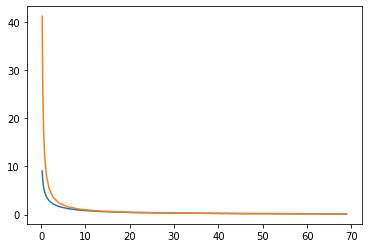

In [206]:
x = np.array(x_factors).T[10,:]
plt.plot(row_sum_10, x)

y = [x[0]]
for i in range(0,14):
    y = y + [y[-1]*1.5]  

plt.plot(row_sum_10, y)

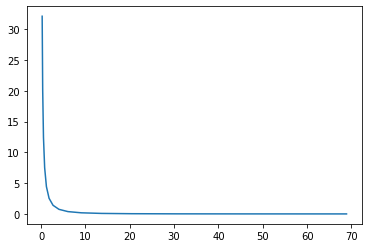

In [207]:
plt.plot(row_sum_10, y-x)

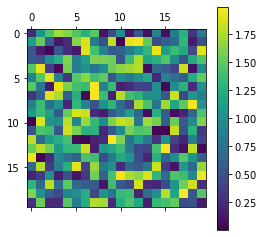

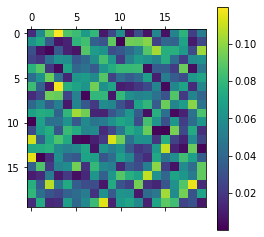

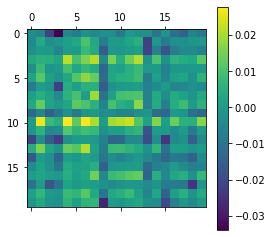

In [3]:
## Sending all elements of the row to higher number

sample = np.random.uniform(low = 0.0, high=2.0, size =(20,20))
r = np.zeros(20)+1
c = r

x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
x_factor, y_factor = normalise(x_factor, y_factor)

plt.matshow(sample)
plt.colorbar()
plt.matshow(scaled_sample)
plt.colorbar()
plt.matshow(sample/(1*20) - scaled_sample)
plt.colorbar()

In [4]:
x_factors = []
y_factors = []
row_sums = []
col_sums = []
row_sum_10 = []

for i in range(0,15):
    sample[10,:] = sample[10,:]*1.5
    row_sum_10 = row_sum_10 + [(sample@r)[10]]
    #print("row sum:", sample@r)
    x_factor, y_factor, scaled_sample = matrix_scaling(sample, r , c)
    x_factor, y_factor = normalise(x_factor, y_factor)
    
    x_factors = x_factors + [x_factor]
    y_factors = y_factors + [y_factor]
    row_sums = row_sums + [sample@r]
    col_sums = col_sums + [sample.T@r]

In [5]:
pd.DataFrame(np.array(x_factors).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.274498,0.275710,0.276527,0.277076,0.277444,0.277690,0.277854,0.277964,0.278037,0.278086,0.278119,0.278141,0.278155,0.278165,0.278171
1,0.234961,0.235999,0.236698,0.237168,0.237483,0.237694,0.237834,0.237928,0.237991,0.238033,0.238061,0.238079,0.238092,0.238100,0.238105
2,0.241594,0.242661,0.243381,0.243864,0.244188,0.244404,0.244549,0.244645,0.244710,0.244753,0.244781,0.244801,0.244813,0.244822,0.244827
3,0.189024,0.189859,0.190422,0.190800,0.191053,0.191223,0.191336,0.191411,0.191462,0.191495,0.191518,0.191533,0.191543,0.191549,0.191554
4,0.227370,0.228374,0.229051,0.229506,0.229810,0.230014,0.230150,0.230241,0.230302,0.230342,0.230369,0.230387,0.230399,0.230407,0.230412
5,0.207655,0.208572,0.209190,0.209605,0.209884,0.210070,0.210194,0.210277,0.210332,0.210369,0.210394,0.210410,0.210421,0.210429,0.210434
6,0.242711,0.243783,0.244505,0.244991,0.245316,0.245533,0.245679,0.245776,0.245840,0.245884,0.245912,0.245932,0.245945,0.245953,0.245959
7,0.206864,0.207778,0.208394,0.208808,0.209085,0.209270,0.209394,0.209477,0.209532,0.209569,0.209593,0.209610,0.209621,0.209628,0.209633
8,0.199655,0.200537,0.201132,0.201531,0.201798,0.201977,0.202097,0.202177,0.202230,0.202265,0.202289,0.202305,0.202315,0.202322,0.202327
9,0.267840,0.269023,0.269821,0.270357,0.270715,0.270955,0.271116,0.271223,0.271294,0.271342,0.271374,0.271395,0.271409,0.271419,0.271425


In [6]:
pd.DataFrame(np.array(y_factors).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.230430,0.229417,0.228739,0.228285,0.227983,0.227781,0.227646,0.227556,0.227496,0.227456,0.227430,0.227412,0.227400,0.227392,0.227387
1,0.202346,0.201456,0.200861,0.200463,0.200197,0.200020,0.199901,0.199822,0.199770,0.199735,0.199711,0.199696,0.199685,0.199678,0.199674
2,0.237476,0.236432,0.235733,0.235266,0.234954,0.234746,0.234607,0.234514,0.234453,0.234412,0.234384,0.234366,0.234354,0.234345,0.234340
3,0.254003,0.252886,0.252139,0.251639,0.251306,0.251083,0.250934,0.250835,0.250769,0.250725,0.250696,0.250676,0.250663,0.250654,0.250649
4,0.193320,0.192470,0.191901,0.191521,0.191267,0.191097,0.190984,0.190909,0.190859,0.190825,0.190803,0.190788,0.190778,0.190771,0.190767
5,0.203980,0.203083,0.202482,0.202081,0.201813,0.201635,0.201515,0.201436,0.201383,0.201347,0.201324,0.201308,0.201298,0.201291,0.201286
6,0.190049,0.189213,0.188654,0.188280,0.188031,0.187864,0.187753,0.187679,0.187630,0.187597,0.187575,0.187560,0.187550,0.187544,0.187539
7,0.195142,0.194284,0.193710,0.193326,0.193070,0.192898,0.192784,0.192708,0.192658,0.192624,0.192601,0.192586,0.192576,0.192569,0.192565
8,0.280130,0.278898,0.278074,0.277523,0.277155,0.276910,0.276746,0.276637,0.276564,0.276515,0.276483,0.276461,0.276447,0.276437,0.276431
9,0.212337,0.211404,0.210779,0.210361,0.210082,0.209896,0.209772,0.209689,0.209634,0.209597,0.209573,0.209556,0.209545,0.209538,0.209533


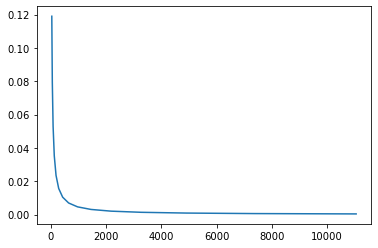

In [14]:
x = np.array(x_factors).T[10,:]
plt.plot(row_sum_10, y)

y = [x[0]]
for i in range(0,14):
    y = y + [y[-1]/1.5]  

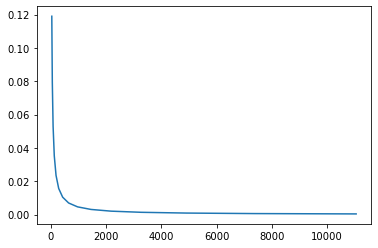

In [15]:
plt.plot(row_sum_10, y)

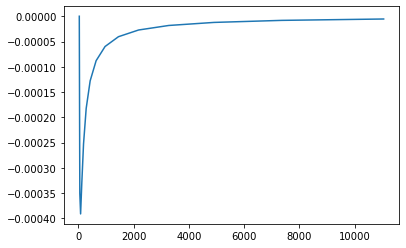

In [8]:
plt.plot(row_sum_10, y-x)